# Financial Stock Analysis

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

## Query Data

In [2]:
# TGT is the ticker for Target
start_date = '2021-07-12'
end_date = datetime.today().strftime('%Y-%m-%d')
ticker='TGT'

def pull_data(ticker):
    """
    Takes the ticker and returns NYSE as a pandas dataframe ranging from the start & end date parameters"""
    
    stock_data = yf.download(tickers=ticker, start=start_date, end=end_date)
    data = pd.DataFrame(stock_data)

    return data



In [3]:
data = pull_data(ticker)

[*********************100%%**********************]  1 of 1 completed


## EDA  of Stock Data

### Data Manipulation and Transformation

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-12,249.500000,252.470001,249.119995,252.240005,234.282135,3056900
2021-07-13,250.500000,253.440002,250.500000,251.750000,233.827011,2392900
2021-07-14,252.600006,254.050003,251.610001,253.630005,235.573166,2578700
2021-07-15,253.699997,254.529999,252.029999,252.929993,234.922989,2646200
2021-07-16,253.899994,254.050003,250.860001,251.149994,233.269714,3415900


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 767 entries, 2021-07-12 to 2024-07-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       767 non-null    float64
 1   High       767 non-null    float64
 2   Low        767 non-null    float64
 3   Close      767 non-null    float64
 4   Adj Close  767 non-null    float64
 5   Volume     767 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.9 KB


In [6]:
price_cols = data.select_dtypes(include=['float64']).columns

In [7]:
data['Daily Delta'] = data['Close'].pct_change() * 100
data['Daily Delta'] = data['Daily Delta'].round(2)

In [8]:
data = data.fillna(0)

In [9]:
data[price_cols] = data[price_cols].map(lambda x: round(x, 2))

In [10]:
# Daily price volatility
daily_volatility = data['Daily Delta'].std()

In [11]:
# Annual price volatilty
# There are 252 trading days in a year
annualized_volatility = daily_volatility * (252 ** 0.5)
annualized_volatility

35.37979718879412

In [12]:
""" # These all look pretty similar on line plots
# Try combining on a clandlestick graph
for col in price_cols:
    
    plt.figure(figsize=(16,8))
    plt.title(f"{col} by Date for {ticker}")

    data[col].plot(); """

' # These all look pretty similar on line plots\n# Try combining on a clandlestick graph\nfor col in price_cols:\n    \n    plt.figure(figsize=(16,8))\n    plt.title(f"{col} by Date for {ticker}")\n\n    data[col].plot(); '

In [13]:
moving_averages = 30, 60, 90, 200

for i in moving_averages:
    data[f'{i} day MA'] = data['Close'].rolling(i).mean().round(2)

### Plot data

In [14]:
def plot_data(data):

    plt.figure(figsize=(16,8))
    plt.title(f"Close by Date for {ticker}")

    ax = data['Close'].plot()
    ax1 = data['30 day MA'].plot()
    ax2 = data['60 day MA'].plot()
    ax3 = data['90 day MA'].plot()
    ax4 = data['200 day MA'].plot()
    plt.legend()
    plt.show();

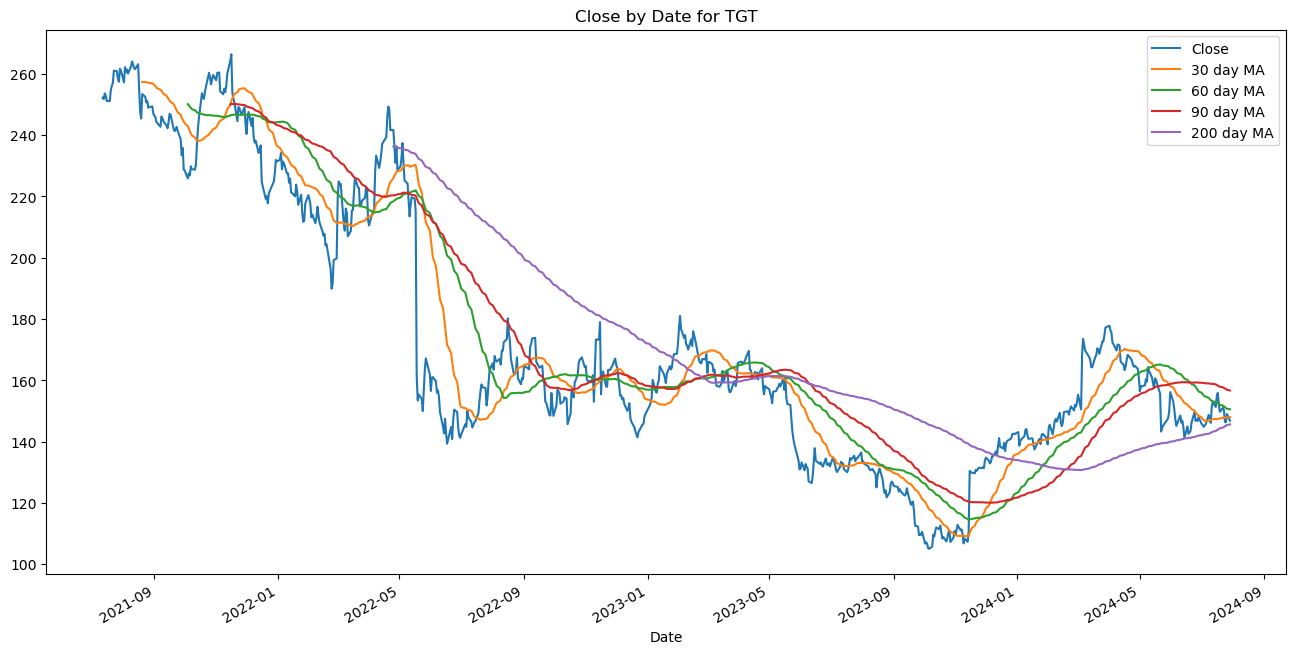

In [15]:
plot_data(data)

In [16]:
""" # return all of the days when the closing price was below the 200 day moving average
below_200 = data['Close'] < data['200 day MA']

# Find the initial crosses
initial_cross_below = below_200 & ~below_200.shift(1).fillna(False)
initial_cross_above = ~below_200 & below_200.shift(1).fillna(True)

plt.figure(figsize=(16,8))
plt.title(f"Close by Date for {ticker}")

ax = data['Close'].plot(label='Close')
ax1 = data['30 day MA'].plot(linestyle='--')
ax2 = data['60 day MA'].plot(linestyle='--')
ax3 = data['90 day MA'].plot(linestyle='--')
ax4 = data['200 day MA'].plot(linestyle='--')

# Plot vertical lines for initial crosses below the 200 day moving average
for day in data[initial_cross_below].index:
    plt.axvline(x=day, color='red', linestyle=':', linewidth=0.75, alpha=0.8)

# Plot vertical lines for initial crosses above the 200 day moving average
for day in data[initial_cross_above].index:
    plt.axvline(x=day, color='green', linestyle=':', linewidth=0.75, alpha=0.8)


plt.legend(); """

' # return all of the days when the closing price was below the 200 day moving average\nbelow_200 = data[\'Close\'] < data[\'200 day MA\']\n\n# Find the initial crosses\ninitial_cross_below = below_200 & ~below_200.shift(1).fillna(False)\ninitial_cross_above = ~below_200 & below_200.shift(1).fillna(True)\n\nplt.figure(figsize=(16,8))\nplt.title(f"Close by Date for {ticker}")\n\nax = data[\'Close\'].plot(label=\'Close\')\nax1 = data[\'30 day MA\'].plot(linestyle=\'--\')\nax2 = data[\'60 day MA\'].plot(linestyle=\'--\')\nax3 = data[\'90 day MA\'].plot(linestyle=\'--\')\nax4 = data[\'200 day MA\'].plot(linestyle=\'--\')\n\n# Plot vertical lines for initial crosses below the 200 day moving average\nfor day in data[initial_cross_below].index:\n    plt.axvline(x=day, color=\'red\', linestyle=\':\', linewidth=0.75, alpha=0.8)\n\n# Plot vertical lines for initial crosses above the 200 day moving average\nfor day in data[initial_cross_above].index:\n    plt.axvline(x=day, color=\'green\', lines

### Plotly
The Plotly api returns interative visuals that provides interactive feedback

#### Libraries

In [17]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [18]:
px.line(data, x=data.index, y=['Close', '30 day MA', '200 day MA'])

In [19]:
def plot_detailed_candlestick(ticker, data):

    # Create subplots with shared x-axis
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        row_heights=[0.7, 0.3], vertical_spacing=0.05,
                        subplot_titles=(f"Close by Date for {ticker}", "Volume"))

    # Add candlestick chart
    fig.add_trace(go.Candlestick(
        x=data.index,
        open=data['Open'],
        high=data['High'],
        low=data['Low'],
        close=data['Close'],
        name='Candlestick'
    ), row=1, col=1)

    # Adding moving averages with dotted lines as 'trace' figures
    fig.add_trace(go.Scatter(
        x=data.index, y=data['30 day MA'], mode='lines', name='30 day MA',
        line=dict(width=1, dash='dot')
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=data.index, y=data['60 day MA'], mode='lines', name='60 day MA',
        line=dict(width=1, dash='dot')
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=data.index, y=data['90 day MA'], mode='lines', name='90 day MA',
        line=dict(width=1, dash='dot')
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=data.index, y=data['200 day MA'], mode='lines', name='200 day MA',
        line=dict(width=1, dash='dot')
    ), row=1, col=1)

    # Add volume bar chart
    fig.add_trace(go.Bar(
        x=data.index, y=data['Volume'], name='Volume',
        marker_color='blue', opacity=0.5
    ), row=2, col=1)

    # Update layout to adjust figure size, add title, and add rangeslider
    fig.update_layout(
        width=1400,
        height=1000,
        showlegend=True,
        xaxis_rangeslider_visible=False,  # Disable the default rangeslider
        xaxis2_rangeslider_visible=True,  # Add a rangeslider to the second x-axis
        xaxis2_rangeslider_thickness=0.05  # Adjust the thickness of the rangeslider
    )

    fig.show()


In [20]:
plot_detailed_candlestick(ticker, data)

## Forcasting stock price

In [30]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

In [22]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily Delta',
       '30 day MA', '60 day MA', '90 day MA', '200 day MA'],
      dtype='object')

### Feature Engineering

In [23]:
df = data

In [24]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek

df

,Open,High,Low,Close,Adj Close,Volume,Daily Delta,30 day MA,60 day MA,90 day MA,200 day MA,year,month,day_of_month,day_of_week
Date,,,,,,,,,,,,,,,
2021-07-12,249.50,252.47,249.12,252.24,234.28,3056900,0.00,NaN,NaN,NaN,NaN,2021,7,12,0
2021-07-13,250.50,253.44,250.50,251.75,233.83,2392900,-0.19,NaN,NaN,NaN,NaN,2021,7,13,1
2021-07-14,252.60,254.05,251.61,253.63,235.57,2578700,0.75,NaN,NaN,NaN,NaN,2021,7,14,2
2021-07-15,253.70,254.53,252.03,252.93,234.92,2646200,-0.28,NaN,NaN,NaN,NaN,2021,7,15,3
2021-07-16,253.90,254.05,250.86,251.15,233.27,3415900,-0.70,NaN,NaN,NaN,NaN,2021,7,16,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-23,150.20,150.96,149.64,150.27,150.27,1622400,-0.50,147.88,151.51,157.52,144.78,2024,7,23,1
2024-07-24,150.29,150.92,145.30,146.45,146.45,3029500,-2.54,147.81,151.21,157.32,144.98,2024,7,24,2
2024-07-25,146.58,149.42,145.99,146.29,146.29,3019700,-0.11,147.81,150.92,157.12,145.19,2024,7,25,3


### Prep data for model

In [25]:
ml_data = df.drop(columns=['Open', 'High', 'Low', 'Adj Close', '30 day MA', '60 day MA', '90 day MA', '200 day MA'])

X = ml_data.drop(columns='Close')
y = ml_data['Close']

In [26]:
# Split data into training and test sets. Setting the randome state at 42 for reproducability and setting the standard test size
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


model = xgb.XGBRegressor()

model.fit(X_train, y_train)
preds = model.predict(X_test)


In [35]:
mse = mean_squared_error(y_test, preds)
rmse = root_mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

model_scores = [mse, rmse, r2]

In [36]:
print(model_scores)

[70.74885474638258, 8.411233842093713, 0.9629607452159447]


In [37]:
df['Price_Prediction'] = model.predict(X)

In [40]:
def plot_predictions(ticker, df):

    # Create subplots with shared x-axis
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        row_heights=[0.7, 0.3], vertical_spacing=0.05,
                        subplot_titles=(f"Close by Date for {ticker}", "Volume"))

    # Add close price line plot
    fig.add_trace(go.Scatter(
        x=df.index, y=df['Close'], mode='lines+markers', name='Close Price',
        line=dict(width=2, color='blue'), marker=dict(size=4, color='blue')
    ), row=1, col=1)

    # Add moving averages with dotted lines
    fig.add_trace(go.Scatter(
        x=df.index, y=df['30 day MA'], mode='lines', name='30 day MA',
        line=dict(width=1, dash='dot', color='green')
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=df.index, y=df['60 day MA'], mode='lines', name='60 day MA',
        line=dict(width=1, dash='dot', color='orange')
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=df.index, y=df['90 day MA'], mode='lines', name='90 day MA',
        line=dict(width=1, dash='dot', color='purple')
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=df.index, y=df['200 day MA'], mode='lines', name='200 day MA',
        line=dict(width=1, dash='dot', color='red')
    ), row=1, col=1)

    # Add the prediction line
    fig.add_trace(go.Scatter(
        x=df.index, y=df['Price_Prediction'], mode='lines', name='Price Prediction',
        line=dict(width=2, dash='dash', color='red')
    ), row=1, col=1)

    # Add volume bar chart
    fig.add_trace(go.Bar(
        x=df.index, y=df['Volume'], name='Volume',
        marker_color='rgba(58, 71, 80, 0.6)'
    ), row=2, col=1)

    # Update layout to adjust figure size, add title, and add rangeslider
    fig.update_layout(
        width=1400,
        height=1000,
        showlegend=True,
        xaxis_rangeslider_visible=False,  # Disable the default rangeslider
        xaxis2_rangeslider_visible=True,  # Add a rangeslider to the second x-axis
        xaxis2_rangeslider_thickness=0.05,  # Adjust the thickness of the rangeslider
        title_x=0.5,
        template='plotly_dark'
    )

    fig.show()


In [41]:
plot_predictions(ticker, df)